In [0]:
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [0]:
#!wget https://github.com/mdtanvirhossain/plantRecognitionByLeaf/archive/master.zip

In [0]:
#!unzip master.zip

In [0]:
#ls

In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

from __future__ import print_function

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import model_to_dot
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout

In [47]:
model = Sequential()
 
model.add(Conv2D(activation ='relu', input_shape = (64,64,3), filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
 
#model.add(Conv2D(activation ='relu',filters=32, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
#model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
model.add(Conv2D(activation ='relu', filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(activation ='relu',filters=128, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
# model.add(Dropout(0.25))

model.add(BatchNormalization())
 
model.add(Conv2D(activation ='relu',filters=256, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

#model.add(Conv2D(activation ='relu',filters=512, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
#model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='softmax'))

#show model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 256)       295168    
__________

In [0]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [0]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [50]:
train_generator = train_datagen.flow_from_directory(
                                                    'plantRecognitionByLeaf-master/dataset/dataset_original/train_data',
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                    'plantRecognitionByLeaf-master/dataset/dataset_original/test_data',
                                                    target_size=(64, 64),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 700 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)


In [0]:
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True

In [53]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=1063 /30,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[learning_rate_reduction])

Epoch 1/20
36/35 [==============================] - 399s 11s/step - loss: 3.2866 - acc: 0.0880 - val_loss: 2.9172 - val_acc: 0.1000
Epoch 2/20
36/35 [==============================] - 348s 10s/step - loss: 2.2886 - acc: 0.1130 - val_loss: 2.2967 - val_acc: 0.1000
Epoch 3/20
36/35 [==============================] - 351s 10s/step - loss: 2.1958 - acc: 0.1768 - val_loss: 3.0953 - val_acc: 0.1280
Epoch 4/20
36/35 [==============================] - 348s 10s/step - loss: 1.6446 - acc: 0.4174 - val_loss: 4.0503 - val_acc: 0.1520
Epoch 5/20
36/35 [==============================] - 352s 10s/step - loss: 1.2751 - acc: 0.5482 - val_loss: 7.1639 - val_acc: 0.1480
Epoch 6/20
36/35 [==============================] - 346s 10s/step - loss: 1.1377 - acc: 0.6048 - val_loss: 3.5391 - val_acc: 0.3333
Epoch 7/20
36/35 [==============================] - 349s 10s/step - loss: 0.8461 - acc: 0.6954 - val_loss: 8.0752 - val_acc: 0.2020
Epoch 8/20
36/35 [==============================] - 348s 10s/step - loss: 0.

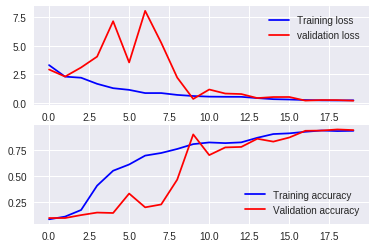

In [54]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [55]:
#Unnecessary

#from keras.preprocessing import image

#test = image.load_img('plantRecognitionByLeaf-master/dataset/dataset_original/test_data/AATA/aata_ (5).jpg',
                      target_size=(32, 32))
#test = image.img_to_array(test)
#test = np.expand_dims(test, axis=0)

#print(model.predict(test))
#print(train_generator.class_indices)

SyntaxError: ignored

In [0]:
ls